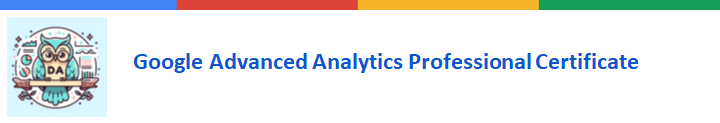

# Activity: Validate and clean your data

## Introduction

In this activity, you will use input validation and label encoding to prepare a dataset for analysis. These are fundamental techniques used in all types of data analysis, from simple linear regression to complex neural networks. 

In this activity, you are a data professional an investment firm that is attempting to invest in private companies with a valuation of at least $1 billion. These are often known as "unicorns." Your client wants to develop a better understanding of unicorns, with the hope they can be early investors in future highly successful companies. They are particularly interested in the investment strategies of the three top unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. 

## Step 1: Imports

Import relevant Python libraries and packages: `numpy`, `pandas`, `seaborn`, and `pyplot` from `matplotlib`.

In [1]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Load the dataset

The data contains details about unicorn companies, such as when they were founded, when they achieved unicorn status, and their current valuation. The dataset `Modified_Unicorn_Companies.csv` is loaded as `companies`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab, so they may be different from similar data used in prior labs. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
companies = pd.read_csv('/kaggle/input/modified-unicorn-companies/Modified_Unicorn_Companies.csv')

# Display the first five rows.
### YOUR CODE HERE ### 
companies.head(5)


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Step 2: Data cleaning


Begin by displaying the data types of the columns in `companies`.

In [4]:
# Display the data types of the columns.

### YOUR CODE HERE ###
companies.dtypes


Company             object
Valuation            int64
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a `pandas` DataFrame property that displays the data types of the columns in the specified DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  The `pandas` DataFrame `dtypes` property will be helpful.

</details>

### Modify the data types

Notice that the data type of the `Date Joined` column is an `object`&mdash;in this case, a string. Convert this column to `datetime` to make it more usable. 

In [5]:
# Apply necessary datatype conversions.

### YOUR CODE HERE ###
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


### Create a new column

Add a column called `Years To Unicorn`, which is the number of years between when the company was founded and when it became a unicorn.

In [6]:
# Create the column Years To Unicorn.

### YOUR CODE HERE ###
companies['Years To Unicorn'] =  companies['Date Joined'].dt.year - companies['Year Founded']


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Extract just the year from the `Date Joined` column. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use `dt.year` to access the year of a datetime object.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the `Year Founded` from the `Date Joined`, and save it to a new column called `Years To Unicorn`.
  
Ensure you're properly extracting just the year (as an integer) from `Date Joined`.

</details>

**QUESTION: Why might your client be interested in how quickly a company achieved unicorn status?**

To find or analyze if there is any correlation between any of the variables with the speed to become a unicorn

### Input validation

The data has some issues with bad data, duplicate rows, and inconsistent `Industry` labels.

Identify and correct each of these issues.

#### Correcting bad data

Get descriptive statistics for the `Years To Unicorn` column.

In [7]:
# Identify and correct the issue with Years To Unicorn.

### YOUR CODE HERE ###
companies['Years To Unicorn'].describe()

count    1074.000000
mean        7.013035
std         5.331842
min        -3.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `describe()` method on the series. Considering the results, does anything seem problematic?

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

A company cannot reach unicorn status before it is founded. In other words, `Years to Unicorn` cannot be less than 0.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Using the `describe()` method on the `Years To Unicorn` series shows that the minimum value is `-3`. Since there cannot be negative time, this value and possibly others are problematic.

</details>

Isolate all rows where the `Years To Unicorn` column contains a negative value.

In [8]:
# Isolate any rows where `Years To Unicorn` is negative

### YOUR CODE HERE ###
mask = companies['Years To Unicorn'] <0
companies[mask] 

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2020,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


**Question: How many rows have negative values in the `Years To Unicorn` column, and what companies are they for?**


1 row, for the company inVision

An internet search reveals that InVision was founded in 2011. Replace the value at `Year Founded` with `2011` for InVision's row. 

In [9]:
# Replace InVision's `Year Founded` value with 2011

### YOUR CODE HERE ###

# Find the row index where a condition is met
row_index = companies.index[companies['Company']== 'InVision'].tolist()[0] # Find the index for 'InVision'


# Change the value using .iloc[]
companies.iloc[row_index, companies.columns.get_loc('Year Founded')] = 2011


# Verify the change was made properly

### YOUR CODE HERE ###
companies[companies['Company'] == 'InVision']



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2011,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To overwrite data in a dataframe in a situation like this, you should use `loc[]` or `iloc[]` selection statements. Otherwise, you might overwrite to a view of the dataframe, which means that you're not overwriting the data in the dataframe itself, and the change will not take permanent effect.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The following code will **not** work:
    
    companies[companies['Company']=='InVision']['Year Founded'] = 2011
    
You must use either `loc[]` or `iloc[]`.

</details>

In [10]:
# This is a simpler way to do it

# Replace InVision's `Year Founded` value with 2011

### YOUR CODE HERE ###
companies.loc[companies['Company']=='InVision', 'Year Founded'] = 2011

# Verify the change was made properly

### YOUR CODE HERE ###
companies[companies['Company']=='InVision']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2011,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


Now, recalculate all the values in the `Years To Unicorn` column to remove the negative value for InVision. Verify that there are no more negative values afterwards.

In [11]:
# Recalculate all values in the `Years To Unicorn` column

### YOUR CODE HERE ###
companies['Years To Unicorn'] =  companies['Date Joined'].dt.year - companies['Year Founded']

# Verify that there are no more negative values in the column

### YOUR CODE HERE ###
companies['Years To Unicorn'].describe()

count    1074.000000
mean        7.021415
std         5.323155
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

#### Issues with `Industry` labels

The company provided you with the following list of industry labels to identify in the data for `Industry`. 

**Note:** Any labels in the `Industry` column that are not in `industry_list` are misspellings.

In [12]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

First, check if there are values in the `Industry` column that are not in `industry_list`. If so, what are they?

In [13]:
# Check which values are in `Industry` but not in `industry_list`

### YOUR CODE HERE ###

# Convert the list to a set
list_set = set(industry_list)

# Convert the DataFrame column to a set
column_set = set(companies['Industry'])

# Subtract the list set from the DataFrame column set
result_set = column_set - list_set


# Print the result
print("List Set:", list_set)
print("---------------------------------------------------------------------------------------------------------")
print("Column Set:", column_set)
print("---------------------------------------------------------------------------------------------------------")
print("Result Set (column_set - list_set):", result_set)

List Set: {'Travel', 'Consumer & retail', 'Auto & transportation', 'E-commerce & direct-to-consumer', 'Hardware', 'Cybersecurity', 'Fintech', 'Mobile & telecommunications', 'Artificial intelligence', 'Other', 'Edtech', 'Supply chain, logistics, & delivery', 'Health', 'Data management & analytics', 'Internet software & services'}
---------------------------------------------------------------------------------------------------------
Column Set: {'Travel', 'Artificial Intelligence', 'Consumer & retail', 'Auto & transportation', 'E-commerce & direct-to-consumer', 'Hardware', 'FinTech', 'Fintech', 'Cybersecurity', 'Mobile & telecommunications', 'Artificial intelligence', 'Other', 'Edtech', 'Supply chain, logistics, & delivery', 'Health', 'Data management & analytics', 'Internet software & services', 'Data management and analytics'}
---------------------------------------------------------------------------------------------------------
Result Set (column_set - list_set): {'Artificial Inte

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

There are many ways to do this. One approach is to consider what data type reduces iterable sequences to their unique elements and allows you to compare membership.

</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

A set is a data type that consists of unique elements and supports membership testing with other sets.

</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Set A &ndash; Set B will result in all the elements that are in Set A but not in Set B. Convert `industry_list` to a set and subtract it from the set of the values in the `Industry` series.

</details>

**Question: Which values currently exist in the `Industry` column that are not in `industry_list`?**


Result Set (column_set - list_set): {'Artificial Intelligence', 'FinTech', 'Data management and analytics'}

Now, correct the bad entries in the `Industry` column by replacing them with an approved string from `industry_list`. To do this, use the [`replace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html) `Series` method on the `Industry` series. When you pass a dictionary to the method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary. If a value is not specified in the dictionary, the series' original value is retained.
</br></br>


```
Example:

 [IN]: column_a = pd.Series(['A', 'B', 'C', 'D'])
       column_a

[OUT]: 0    A
       1    B
       2    C
       3    D
       dtype: object

 [IN]: replacement_dict = {'A':'z', 'B':'y', 'C':'x'}
       column_a = column_a.replace(replacement_dict)
       column_a
       
[OUT]: 0    z
       1    y
       2    x
       3    D
       dtype: object

```

1. Create a dictionary called `replacement_dict` whose keys are the incorrect spellings in the `Industry` series and whose values are the correct spelling, as indicated in `industry_list`.

2. Call the `replace()` method on the `Industry` series and pass to it `replacement_dict` as its argument. Reassign the result back to the `Industry` column.

3. Verify that there are no longer any elements in `Industry` that are not in `industry_list`.

In [14]:
# 1. Create `replacement_dict`

### YOUR CODE HERE ###
replacement_dict = {'Artificial Intelligence':'Artificial intelligence', 'FinTech':'Fintech', 'Data management and analytics':'Data management & analytics'}

# 2. Replace the incorrect values in the `Industry` column

### YOUR CODE HERE ###
companies['Industry'] = companies['Industry'].replace(replacement_dict)

# 3. Verify that there are no longer any elements in `Industry` that are not in `industry_list`

### YOUR CODE HERE ###
# Convert the DataFrame column to a set
column_set = set(companies['Industry'])

# Subtract the list set from the DataFrame column set
result_set = column_set - list_set


# Print the result
print("List Set:", list_set)
print("---------------------------------------------------------------------------------------------------------")
print("Column Set:", column_set)
print("---------------------------------------------------------------------------------------------------------")
print("Result Set (column_set - list_set):", result_set)

List Set: {'Travel', 'Consumer & retail', 'Auto & transportation', 'E-commerce & direct-to-consumer', 'Hardware', 'Cybersecurity', 'Fintech', 'Mobile & telecommunications', 'Artificial intelligence', 'Other', 'Edtech', 'Supply chain, logistics, & delivery', 'Health', 'Data management & analytics', 'Internet software & services'}
---------------------------------------------------------------------------------------------------------
Column Set: {'Travel', 'Consumer & retail', 'Auto & transportation', 'E-commerce & direct-to-consumer', 'Hardware', 'Cybersecurity', 'Fintech', 'Mobile & telecommunications', 'Artificial intelligence', 'Other', 'Edtech', 'Supply chain, logistics, & delivery', 'Health', 'Data management & analytics', 'Internet software & services'}
---------------------------------------------------------------------------------------------------------
Result Set (column_set - list_set): set()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the example provided for how to use the `replace()` `Series` method.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

When you define the `replacement_dict` dictionary, the misspellings should be the keys and the correct spellings should be the values.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>   

When you call `replace()` on the `Industry` series and pass to it the `replacement_dict` dictionary as an argument, you must reassign the result back to `companies['Industry']` for the change to take effect.   
    
</details>

#### Handling duplicate rows

The business mentioned that no company should appear in the data more than once.

Verify that this is indeed the case, and if not, clean the data so each company appears only once.

Begin by checking which, if any, companies are duplicated. Filter the data to return all occurrences of those duplicated companies.

In [15]:
# Isolate rows of all companies that have duplicates

### YOUR CODE HERE ###
duplicate_companies = companies[companies.duplicated(subset='Company', keep=False)]

duplicate_companies
 

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
385,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,United Kingdom,Europe,2007,$233M,"TSG Consumer Partners, Crowdcube",10
386,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,UnitedKingdom,Europe,2007,$233M,TSG Consumer Partners,10
510,ZocDoc,2,2015-08-20,Health,New York,United States,North America,2007,$374M,"Founders Fund, Khosla Ventures, Goldman Sachs",8
511,ZocDoc,2,2015-08-20,Health,NaN,United States,North America,2007,$374M,Founders Fund,8
1031,SoundHound,1,2018-05-03,Artificial intelligence,Santa Clara,United States,North America,2005,$215M,"Tencent Holdings, Walden Venture Capital, Glob...",13
1032,SoundHound,1,2018-05-03,Other,Santa Clara,United States,North America,2005,$215M,Tencent Holdings,13


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Check for duplicated values specifically in the `Company` column, not entire rows that are duplicated. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The pandas [`duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated) `DataFrame` method can indentify duplicated rows. Apply it to the `Company` column in `companies` to find which companies appear more than once.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

* To specify that you want to check for duplicates only in the `Company` column, indicate this with the `subset` parameter.
* To return _all_ occurrences of duplicates, set the `keep` parameter to `False`. 
    
</details>

**Question: Do these duplicated companies seem like legitimate data points, or are they problematic data?**


the duplicated companies don't seem like legitimate data points, they are problematic data because they are an exact copy of their match (field by field comparison), those records should be accounted for

Keep the first occurrence of each duplicate company and drop the subsequent rows that are copies.

In [16]:
# Drop rows of duplicate companies after their first occurrence

### YOUR CODE HERE ###
companies.drop_duplicates(subset='Company', keep='first', inplace=True)
 


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the [`drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) `DataFrame` method. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Make sure to subset `Company` and reassign the results back to the `companies` dataframe for the changes to take effect.
    
</details>

**Question: Why is it important to perform input validation?**


To confirm our data is ready for analysis and to be able to generate accurate predictive models 

**Question: What steps did you take to perform input validation for this dataset?**


Imported the dataset
Analyzed the type of the columns
Modified date fields from string format into date format
Processed date fields to obtain new column with only the year to facilitate verification
Generated a calculated field with the difference of year fields to validate values
Isolated rows with incorrect values, replaced errors with correct values on these rows
used the describe() function to review range values of particular fields
Validated labels for the industry field, used sets and set logic to compare values
Used the replace series method with a replacement dictionary to clean incorrect labels
Used the duplicated function from the dataframe to clean duplicates from the dataset


### Convert numerical data to categorical data

Sometimes, you'll want to simplify a numeric column by converting it to a categorical column. To do this, one common approach is to break the range of possible values into a defined number of equally sized bins and assign each bin a name. In the next step, you'll practice this process.

#### Create a `High Valuation` column

The data in the `Valuation` column represents how much money (in billions, USD) each company is valued at. Use the `Valuation` column to create a new column called `High Valuation`. For each company, the value in this column should be `low` if the company is in the bottom 50% of company valuations and `high` if the company is in the top 50%.

In [17]:
# Create new `High Valuation` column
# Use qcut to divide Valuation into 'high' and 'low' Valuation groups

### YOUR CODE HERE ###
companies['High Valuation'] = pd.qcut(companies['Valuation'], q=2, labels=["Low", "High"])
companies.head(15)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,High
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,High
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,High
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,High
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,High
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6,High
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",7,High
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2,High
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2,High
9,Databricks,38,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",6,High


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

There are multiple ways to complete this task. Review what you've learned about organizing data into equal quantiles.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Consider using the pandas [`qcut()`](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) function. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `qcut()` to divide the data into two equal-sized quantile buckets. Use the `labels` parameter to define the output labels. The values you give for `labels` will be the values that are inserted into the new column. 
    
</details>

### Convert categorical data to numerical data

Three common methods for changing categorical data to numerical are:

1. Label encoding: order matters (ordinal numeric labels)
2. Label encoding: order doesn't matter (nominal numeric labels)
3. Dummy encoding: order doesn't matter (creation of binary columns for each possible category contained in the variable)

The decision on which method to use depends on the context and must be made on a case-to-case basis. However, a distinction is typically made between categorical variables with equal weight given to all possible categories vs. variables with a hierarchical structure of importance to their possible categories.  

For example, a variable called `subject` might have possible values of `history`, `mathematics`, `literature`. In this case, each subject might be **nominal**&mdash;given the same level of importance. However, you might have another variable called `class`, whose possible values are `freshman`, `sophomore`, `junior`, `senior`. In this case, the class variable is **ordinal**&mdash;its values have an ordered, hierarchical structure of importance. 

Machine learning models typically need all data to be numeric, and they generally use ordinal label encoding (method 1) and dummy encoding (method 3). 

In the next steps, you'll convert the following variables: `Continent`, `Country/Region`, and `Industry`, each using a different approach.

### Convert `Continent` to numeric

For the purposes of this exercise, suppose that the investment group has specified that they want to give more weight to continents with fewer unicorn companies because they believe this could indicate unrealized market potential. 

**Question: Which type of variable would this make the `Continent` variable in terms of how it would be converted to a numeric data type?**


[Write your response here. Double-click (or enter) to edit.]

Rank the continents in descending order from the greatest number of unicorn companies to the least.

In [18]:
# Rank the continents by number of unicorn companies

### YOUR CODE HERE ###

# Use value_counts() to rank continents in descending order
continent_ranking = companies['Continent'].value_counts()

# Print the ranking
print(continent_ranking)

Continent
North America    586
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: count, dtype: int64


<details>
  <summary><h4><strong>Hint</strong></h4></summary>

Use the `value_counts()` method on the `Continent` series.
    
</details>

Now, create a new column called `Continent Number` that represents the `Continent` column converted to numeric in the order of their number of unicorn companies, where North America is encoded as `1`, through Africa, encoded as `6`.

In [19]:
# Create numeric `Continent Number` column

### YOUR CODE HERE ###

# Define the mapping based on the order provided
continent_mapping = {
    'North America': 1,
    'Asia': 2,
    'Europe': 3,
    'South America': 4,
    'Oceania': 5,
    'Africa': 6
}

# Map the Continent column to their respective numeric codes
# companies['Continent Number'] = companies['Continent'].map(continent_mapping)

companies['Continent Number'] = companies['Continent'].replace(continent_mapping)

<ipython-input-19-80b450c99c31>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  companies['Continent Number'] = companies['Continent'].replace(continent_mapping)


<details>
  <summary><h4><strong>Hint </strong></h4></summary>

Create a mapping dictionary and use the `replace()` method on the `Category` column. Refer to the example provided above for more information about `replace()`.
    
</details>

### Convert `Country/Region` to numeric

Now, suppose that within a given continent, each company's `Country/Region` is given equal importance. For analytical purposes, you want to convert the values in this column to numeric without creating a large number of dummy columns. Use label encoding of this nominal categorical variable to create a new column called `Country/Region Numeric`, wherein each unique `Country/Region` is assigned its own number. 

In [20]:
# Create `Country/Region Numeric` column
# Create numeric categories for Country/Region

### YOUR CODE HERE ###
# Apply label encoding to the Country/Region column
companies['Country/Region Numeric'] = companies['Country/Region'].astype('category').cat.codes

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about converting a variable with a string/object data type to a category.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

To use label encoding, apply `.astype('category').cat.codes` to the `Country/Region` in `companies`.
    
</details>

### Convert `Industry` to numeric

Finally, create dummy variables for the values in the `Industry` column. 

In [21]:
# Convert `Industry` to numeric data
companies['Industry Numeric'] = companies['Industry'].astype('category').cat.codes

# Create dummy variables with Industry values

### YOUR CODE HERE ###
industry_dummies = pd.get_dummies(companies['Industry'], prefix='Industry')

# Combine `companies` DataFrame with new dummy Industry columns

### YOUR CODE HERE ###
companies = pd.concat([companies, industry_dummies], axis=1)

Display the first few rows of `companies`

In [22]:
### YOUR CODE HERE ###
companies.head(15)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Continent Number,Country/Region Numeric,Industry Numeric,Industry_Artificial intelligence,Industry_Auto & transportation,Industry_Consumer & retail,Industry_Cybersecurity,Industry_Data management & analytics,Industry_E-commerce & direct-to-consumer,Industry_Edtech,Industry_Fintech,Industry_Hardware,Industry_Health,Industry_Internet software & services,Industry_Mobile & telecommunications,Industry_Other,"Industry_Supply chain, logistics, & delivery",Industry_Travel
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,High,2,9,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,High,1,44,12,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,High,2,9,5,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,High,1,44,7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,High,3,38,7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6,High,5,1,10,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",7,High,3,43,7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2,High,1,44,13,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2,High,1,44,2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
9,Databricks,38,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",6,High,1,44,4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider using `pd.get_dummies` on the specified column. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

When you call `pd.get_dummies()` on a specified series, it will return a dataframe consisting of each possible category contained in the series represented as its own binary column. You'll then have to combine this new dataframe of binary columns with the existing `companies` dataframe.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

You can use `pd.concat([col_a, col_b])` to combine the two dataframes. Remember to specify the correct axis of concatenation and to reassign the result back to the `companies` dataframe.
    
</details>

**Question: Which categorical encoding approach did you use for each variable? Why?**

Continent - Ordinal label encoding was used because there was a hierarchical order to the categories.

Country/Region - Nominal label encoding was used because there was not a hierarchical order the categories.

Industry - Dummy encoding was used because there were not many different categories represented and they were all equally important.

**Question: How does label encoding change the data?**


Label encoding changes the data by assigning each category a unique number instead of a qualitative value.

**Question: What are the benefits of label encoding?**


Label encoding is useful in machine learning models, because many types of machine learning require all variables to be of a numeric data type.

**Question: What are the disadvantages of label encoding?**


Label encoding may make it more difficult to directly interpet what a column value represents. Further, it may introduce unintended relationships between the categorical data in a dataset.

## Conclusion

**What are some key takeaways that you learned during this lab?**

* Input validation is essential for ensuring data is high quality and error-free.
* In practice, input validation requires trial and error to identify issues and determine the best way to fix them.
* There are benefits and disadvantages to both label encoding and dummy/one-hot encoding.
* The decision to use label encoding versus dummy/one-hot encoding needs to be made on a case-by-case basis.

**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.